In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
%matplotlib inline         

from skimage.io import imread
from skimage import color
from skimage import filters

astro = imread('astronaut.png')

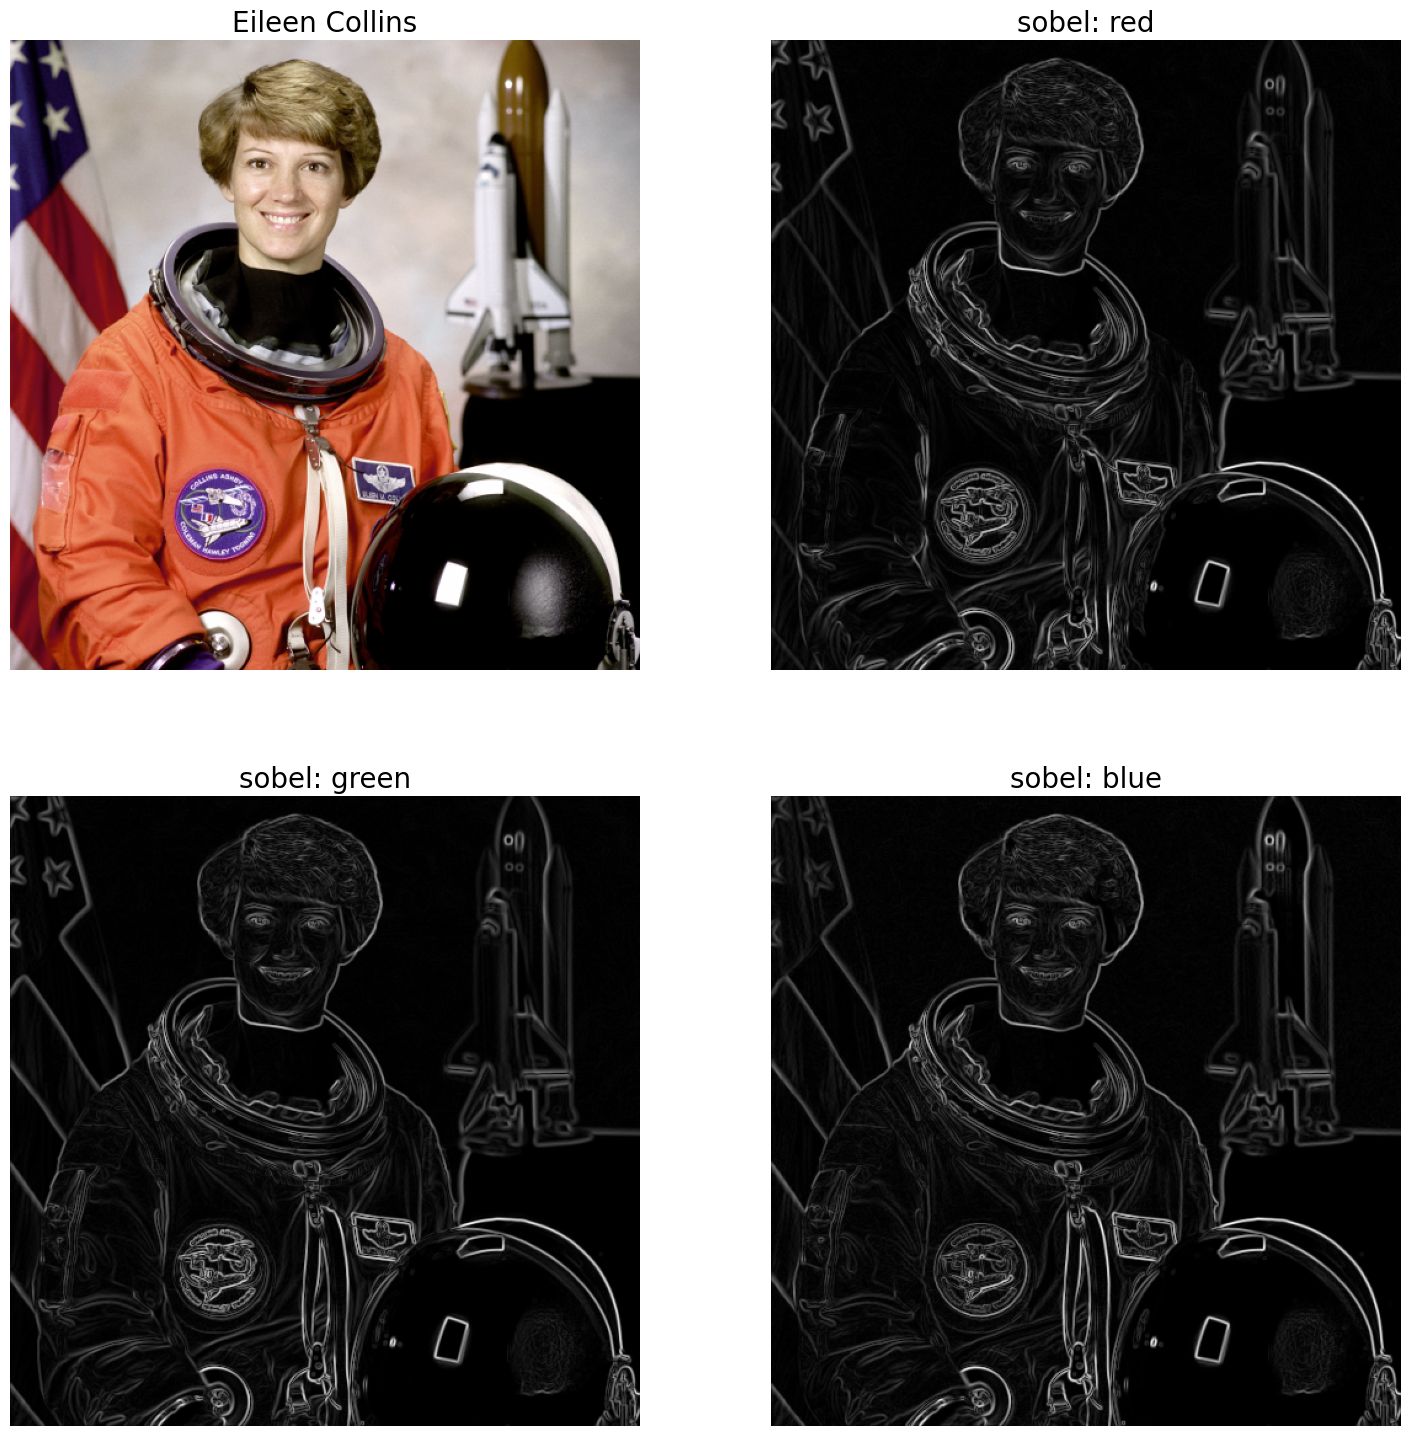

In [2]:
# Sobel filter on individual color channels
plt.figure(figsize=(18,18))

plt.subplot(221)
plt.imshow(astro)
plt.axis('off')
plt.title('Eileen Collins', fontsize=20)

plt.subplot(222)
plt.imshow(filters.sobel(astro[:,:,0]), cmap=plt.cm.gray)
plt.axis('off')
plt.title('sobel: red', fontsize=20)

plt.subplot(223)
plt.imshow(filters.sobel(astro[:,:,1]), cmap=plt.cm.gray)
plt.axis('off')
plt.title('sobel: green', fontsize=20)

plt.subplot(224)
plt.imshow(filters.sobel(astro[:,:,2]), cmap=plt.cm.gray)
plt.axis('off')
plt.title('sobel: blue', fontsize=20)
plt.show()

# difficult to interpret, see e.g. flag

In [3]:
from skimage.color.adapt_rgb import adapt_rgb, each_channel, hsv_value

# each_channel
# Pass each of the RGB channels to the filter one-by-one, and stitch the results back into an RGB image.

@adapt_rgb(each_channel)
def sobel_each(image):
    return filters.sobel(image)

In [4]:
# hsv_value
# Convert the RGB image to HSV and pass the value channel to the filter. 
# The filtered result is inserted back into the HSV image and converted back to RGB.

@adapt_rgb(hsv_value)
def sobel_hsv(image):
    return filters.sobel(image)

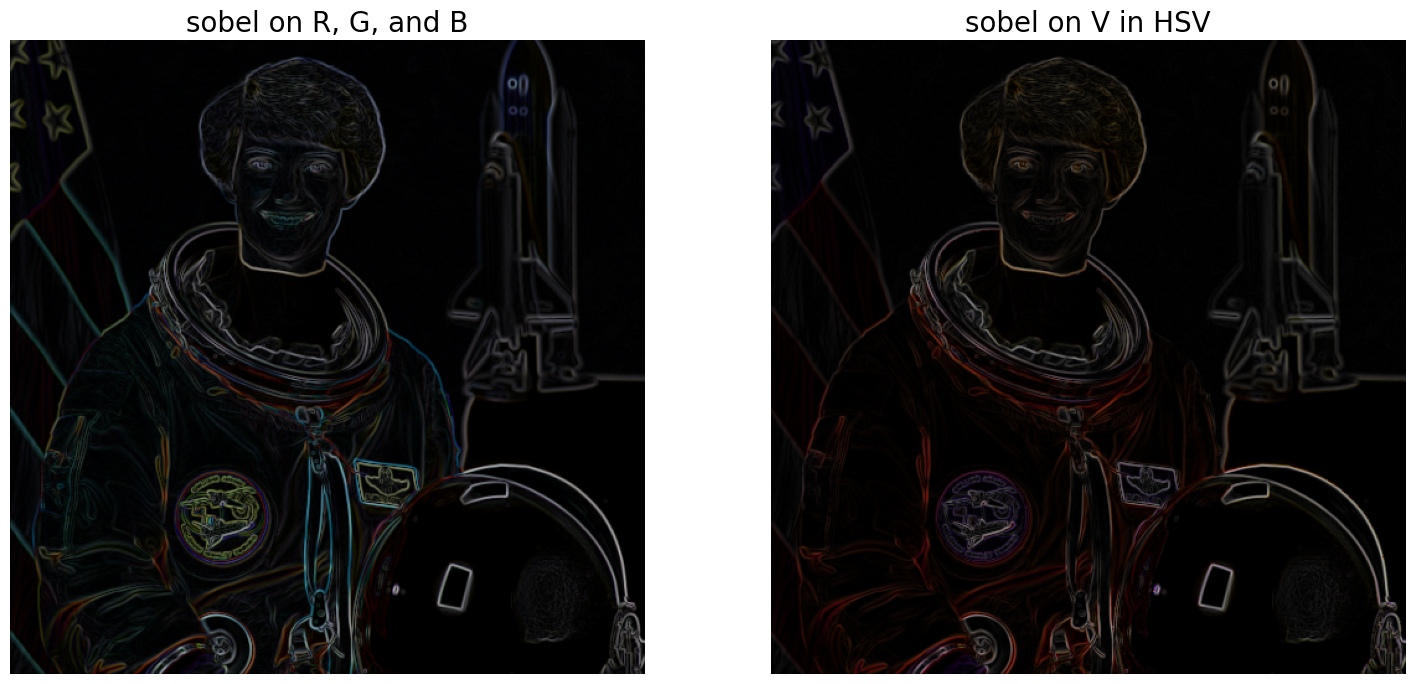

In [5]:
plt.figure(figsize=(18,9))

plt.subplot(121)
plt.imshow(sobel_each(astro)) #, cmap=plt.cm.gray)
plt.axis('off')
plt.title('sobel on R, G, and B', fontsize=20)

plt.subplot(122)
plt.imshow(sobel_hsv(astro))#, cmap=plt.cm.gray)
plt.axis('off')
plt.title('sobel on V in HSV', fontsize=20)
plt.show()